In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

In [2]:
df_gold = pd.read_csv('EDA_Gold_Silver_prices.csv')

In [3]:
df_gold.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [4]:
df_gold.shape

(241, 3)

In [5]:
np.corrcoef(x=df_gold['SilverPrice'], y=df_gold['GoldPrice'])

array([[1.        , 0.95425596],
       [0.95425596, 1.        ]])

In [6]:
# pd.to_datetime(df_gold.Month)

In [7]:
def getMonth(x):
    return x.split("-")[0]

In [8]:
def getYear(x):
    return x.split("-")[1]

In [9]:
df_gold['Year'] = df_gold['Month'].apply(getYear)

In [10]:
df_gold['Month'] = df_gold['Month'].apply(getMonth)

In [11]:
df_gold.head(10)

,Month,SilverPrice,GoldPrice,Year
0,Mar,186.48,12619.24,97
1,Apr,170.65,12338.59,97
2,May,170.44,12314.94,97
3,Jun,169.96,12202.78,97
4,Jul,155.80,11582.07,97
5,Aug,162.16,11640.38,97
6,Sep,172.13,11755.57,97
7,Oct,181.57,11769.89,97
8,Nov,187.99,11370.19,97
9,Dec,224.16,11324.79,97


In [12]:
df_gold.Year.unique()

array(['97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07',
       '08', '09', '10', '11', '12', '13', '14', '15', '16', '17'],
      dtype=object)

In [13]:
df_gold.Year = df_gold.Year.astype(int)

In [14]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
Month          241 non-null object
SilverPrice    241 non-null float64
GoldPrice      241 non-null float64
Year           241 non-null int32
dtypes: float64(2), int32(1), object(1)
memory usage: 6.7+ KB


In [15]:
df_08 = df_gold[df_gold['Year'] == 8]

In [16]:
round(np.corrcoef(x=df_08['SilverPrice'], y = df_08['GoldPrice'])[0,1],2)

0.01

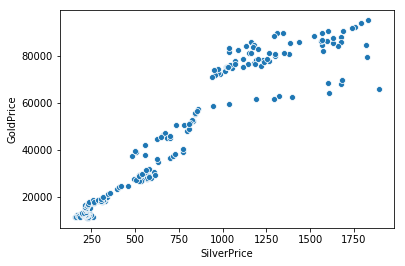

In [19]:
sns.scatterplot(x='SilverPrice', y='GoldPrice', data=df_gold)

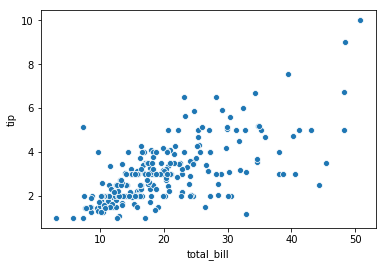

In [20]:
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

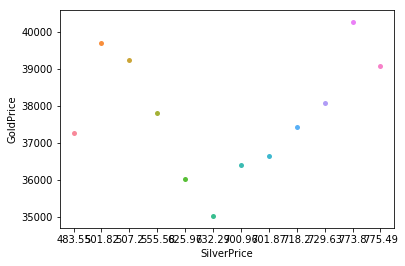

In [21]:
sns.swarmplot(x='SilverPrice', y = 'GoldPrice', data=df_08)

In [23]:
# sns.swarmplot(x='SilverPrice', y = 'GoldPrice', data=df_gold)

In [24]:
df_currency = pd.read_csv('currencies.csv')

In [25]:
df_currency.shape

(11, 52)

In [31]:
df_currency.head()

,Date,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,2016-07-01,9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,2016-07-05,9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,2016-07-06,9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,2016-07-07,9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,2016-07-08,9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


In [28]:
df_currency['Currency']=pd.to_datetime(df_currency.Currency)

In [30]:
df_currency.rename(columns={'Currency':'Date'}, inplace=True)

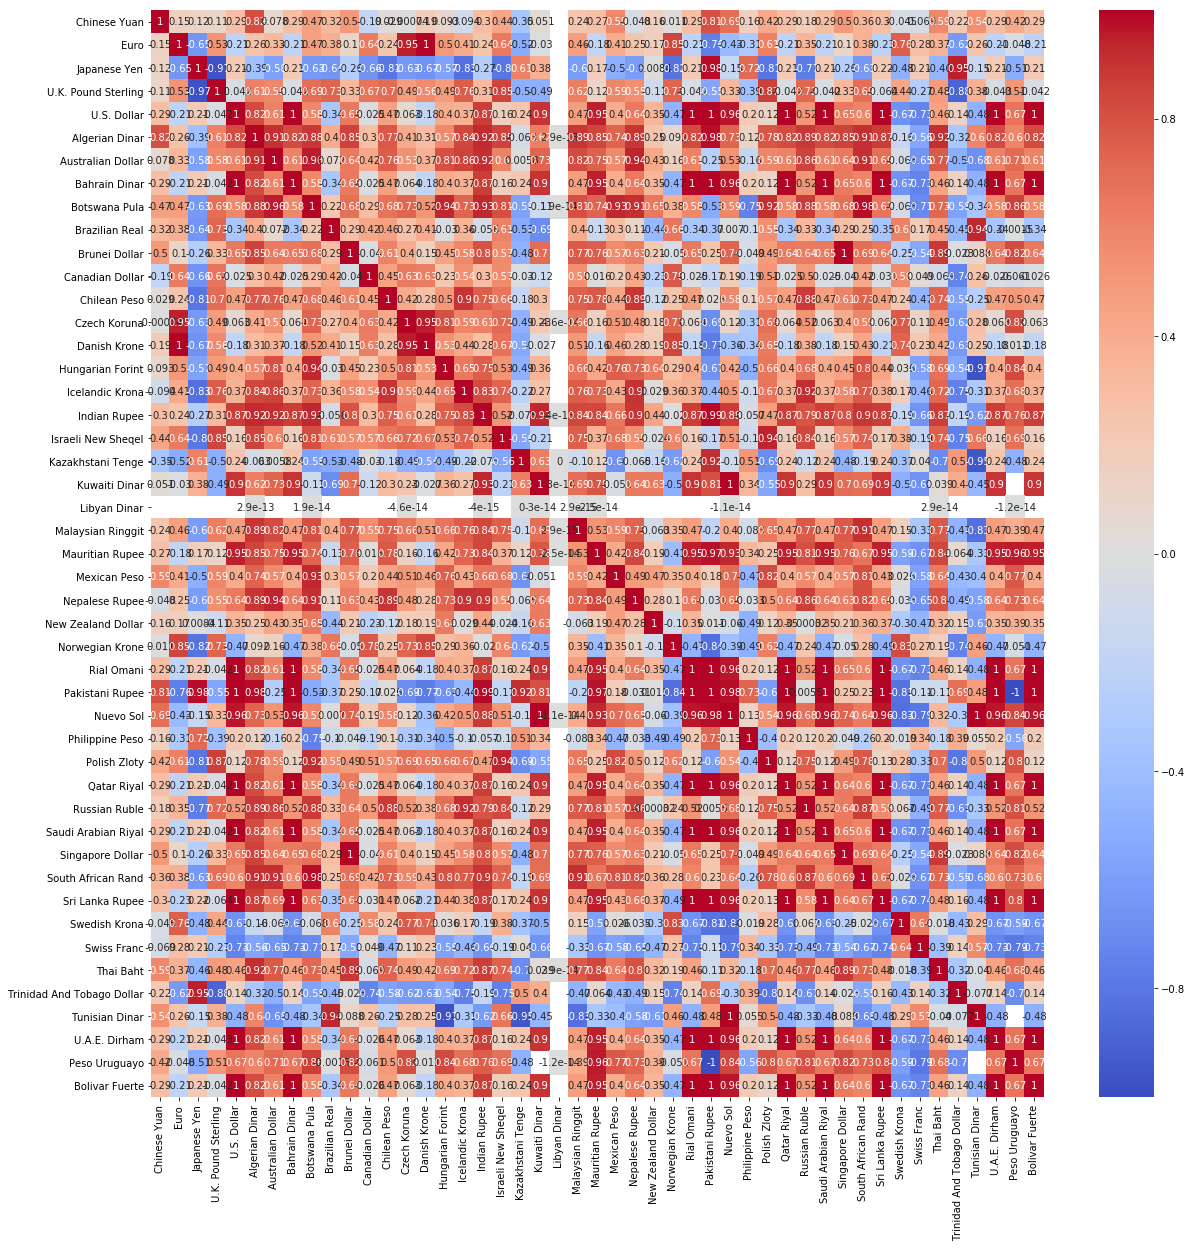

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df_currency.corr(),cmap=cm.get_cmap('coolwarm'), annot=True)
plt.savefig('heatmap_1'+'.png')

In [36]:
from scipy.cluster.hierarchy import dendrogram

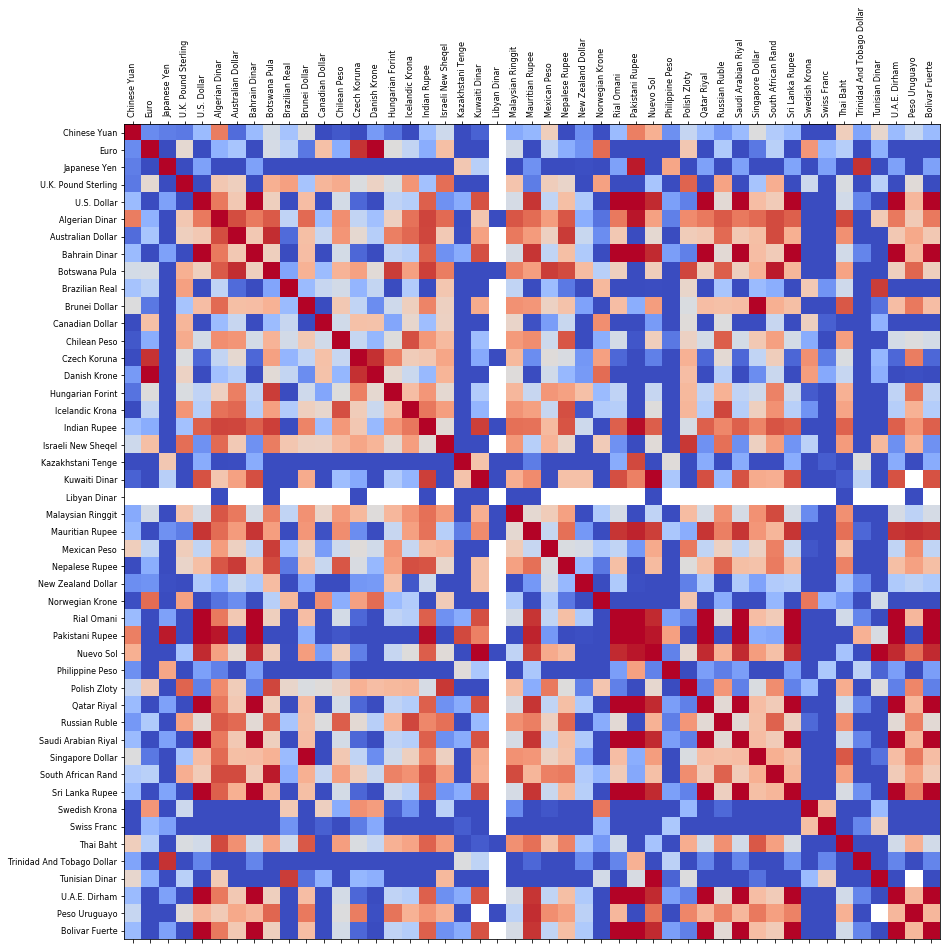

In [40]:
corr = df_currency.corr()
size = 15
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(corr, 'average')
Z[0]

ValueError: The condensed distance matrix must contain only finite values.

NameError: name 'Z' is not defined

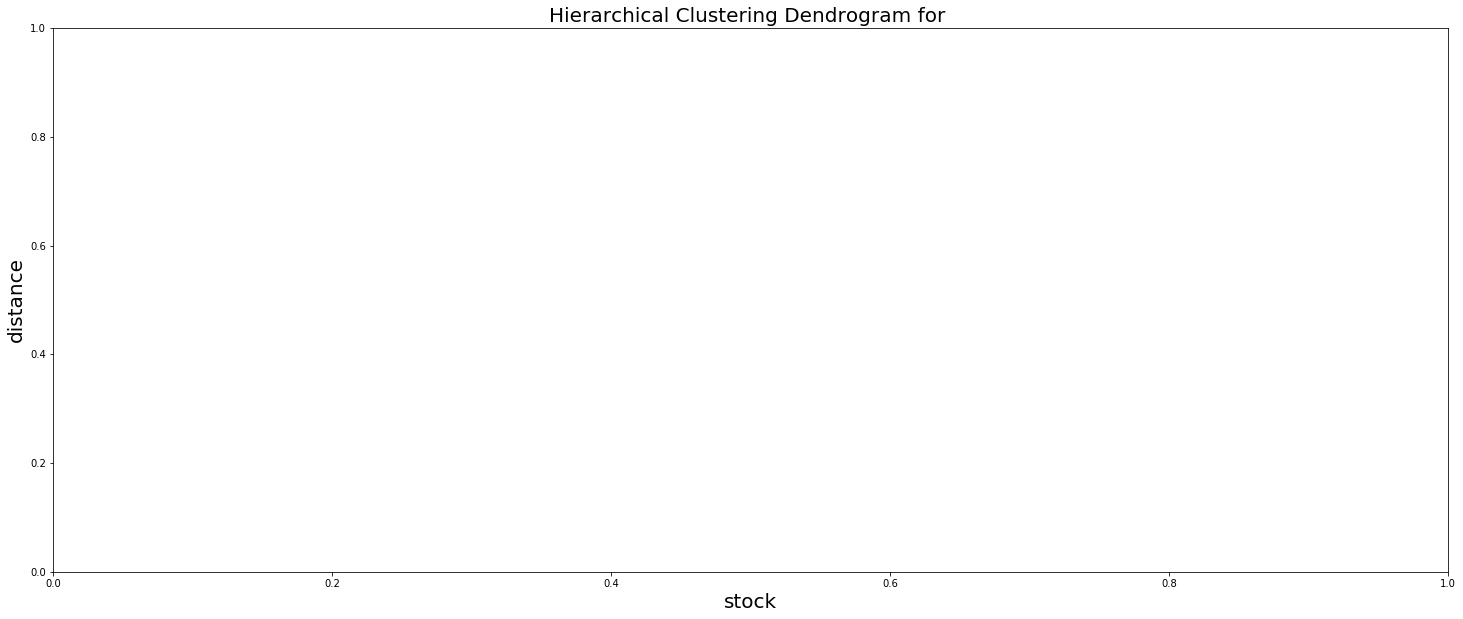

In [45]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
index = 0
plt.title('Hierarchical Clustering Dendrogram for ', fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.savefig('img/dendogram_'+index+'.png')
plt.show()

In [47]:
from scipy.cluster import hierarchy as hc

In [48]:
corr = 1 - df_currency.corr() 

corr_condensed = hc.distance.squareform(corr) # convert to condensed
z = hc.linkage(corr_condensed, method='average')
dendrogram = hc.dendrogram(z, labels=corr.columns)
plt.show()

ValueError: Distance matrix 'X' must be symmetric.

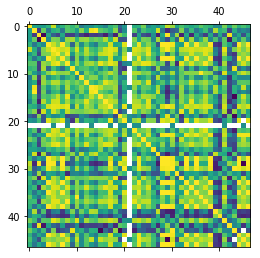

In [51]:
plt.matshow(df_currency.corr())
plt.show()

In [59]:
df_currency.columns

Index(['Date', 'Chinese Yuan', 'Euro', 'Japanese Yen', 'U.K. Pound Sterling',
       'U.S. Dollar', 'Algerian Dinar', 'Australian Dollar', 'Bahrain Dinar',
       'Botswana Pula', 'Brazilian Real', 'Brunei Dollar', 'Canadian Dollar',
       'Chilean Peso', 'Colombian Peso', 'Czech Koruna', 'Danish Krone',
       'Hungarian Forint', 'Icelandic Krona', 'Indian Rupee',
       'Indonesian Rupiah', 'Iranian Rial', 'Israeli New Sheqel',
       'Kazakhstani Tenge', 'Korean Won', 'Kuwaiti Dinar', 'Libyan Dinar',
       'Malaysian Ringgit', 'Mauritian Rupee', 'Mexican Peso',
       'Nepalese Rupee', 'New Zealand Dollar', 'Norwegian Krone', 'Rial Omani',
       'Pakistani Rupee', 'Nuevo Sol', 'Philippine Peso', 'Polish Zloty',
       'Qatar Riyal', 'Russian Ruble', 'Saudi Arabian Riyal',
       'Singapore Dollar', 'South African Rand', 'Sri Lanka Rupee',
       'Swedish Krona', 'Swiss Franc', 'Thai Baht',
       'Trinidad And Tobago Dollar', 'Tunisian Dinar', 'U.A.E. Dirham',
       'Peso Urugua

In [62]:
df_q1 = df_currency[['Indian Rupee', 'Australian Dollar', 'U.S. Dollar', 'Euro', 'Japanese Yen']]

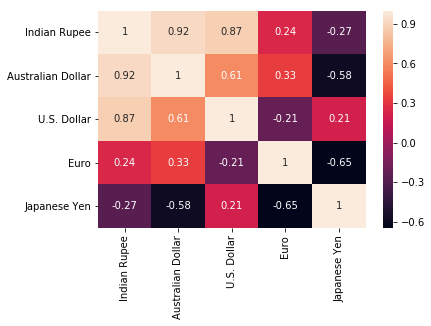

In [65]:
sns.heatmap(df_q1.corr(), annot=True)

In [66]:
df_q2 = df_currency[['Indian Rupee', 'Australian Dollar', 'U.S. Dollar', 'Euro', 'Japanese Yen','U.K. Pound Sterling','Chinese Yuan']]

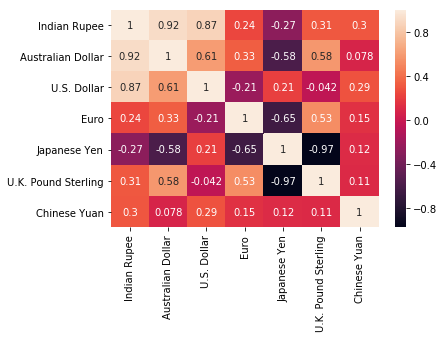

In [67]:
sns.heatmap(df_q2.corr(), annot=True)

In [68]:
df_class8 = pd.read_csv("nas.csv")

In [69]:
df_class8.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [70]:
df_class8.shape

(8801, 64)

In [71]:
df_q1 = df_class8[['Mother.edu', 'Siblings']]

In [72]:
df_q1.shape

(8801, 2)

In [74]:
df_q1.Siblings = df_q1.Siblings.apply(lambda x:x.split()[0])

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [75]:
df_q1.Siblings.unique()

array(['1', '3', '2', '4+', 'Single'], dtype=object)

In [77]:
df_q1 = df_q1[df_q1['Mother.edu']=='Illiterate']

In [78]:
df_q1.Siblings.value_counts()

2         923
1         533
3         532
4+        469
Single     88
Name: Siblings, dtype: int64

In [79]:
df_q2 = df_class8[['Father.edu', 'Science..']]